In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization
from tensorflow.keras.models import load_model

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

|Feature | Description
|------|------------
|**Country** | countries has been collected from the same WHO data repository website 
|**Year**|year 2013-2000
|**Status**|Status of country **Developing** or **Developed**
|**Life expectancy**|Life Expectancy in age **our target**
|**Adult Mortality**|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
|**infant deaths**|Number of Infant Deaths per 1000 population
|**Alcohol**|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
|**percentage expenditure**|Expenditure on health as a percentage of Gross Domestic Product per capita(%)
|**Hepatitis B**|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
|**Measles**|Measles - number of reported cases per 1000 population
|**BMI**|Average Body Mass Index of entire population
|**under-five deaths**|Number of under-five deaths per 1000 population
|**Polio**|Polio (Pol3) immunization coverage among 1-year-olds (%)
|**Total expenditure**|General government expenditure on health as a percentage of total government expenditure (%)
|**Diphtheria**|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
|**HIV/AIDS**|Deaths per 1 000 live births HIV/AIDS (0-4 years)
|**GDP**|Gross Domestic Product per capita (in USD)
|**Population**|Population of the country
|**thinness  1-19 years**|Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
|**thinness 5-9 years**|Prevalence of thinness among children for Age 5 to 9(%)
|**Income composition of resources**|Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
|**Schooling**|Number of years of Schooling(years)

In [8]:
#print number of rows and columns in the dataset

print("Number of Rows:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Rows: 2938
Number of Features: 22


In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# **<font color = #208AAE>Handling Missing Values</font>**
- 'Life expectancy '
- 'Adult Mortality'
- 'Alcohol'
- 'Hepatitis B'
- ' BMI '
- 'Polio'
- 'Total expenditure'
- 'Diphtheria '
- 'GDP'
- 'Population'
- ' thinness  1-19 years'
- ' thinness 5-9 years'
- 'Income composition of resources'
- 'Schooling'

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [15]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### **<font color = #8b7a5e>Dealing with outliers</font>**

In [18]:
# Specify the list of columns you want to handle outliers for
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.mean(df[col_name]), df[col_name])


In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 

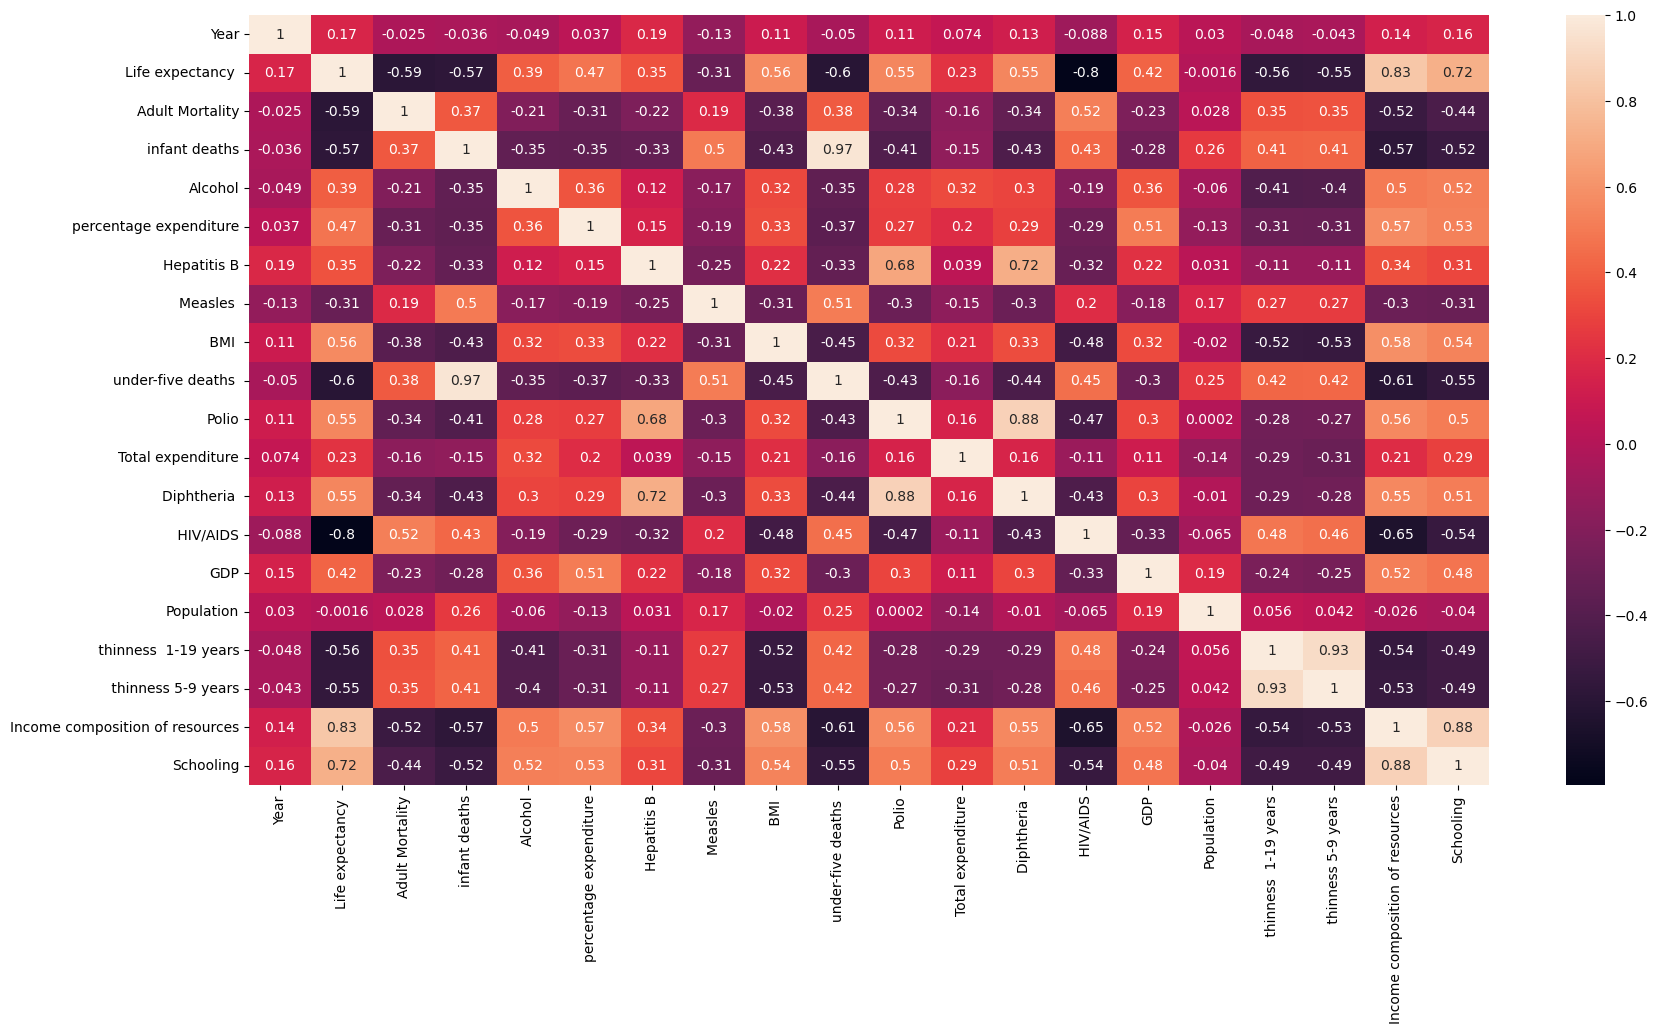

In [22]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize= (20,10))
# Create a correlation matrix for selected numeric columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot = True )
plt.show()


# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

# **<font color = #208AAE>Handling Categorical Features (encoding)</font>**

- 'Country'
- 'Status'

#### **<font color = #8b7a5e>Values Before Handling</font>**

In [26]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [29]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [31]:
# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])

#### **<font color = #8b7a5e>Values After Handling</font>**

In [34]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [36]:
df['Status'].unique()

array([1, 0])

# **<font color = #208AAE>Splitting Features from Target</font>**

In [39]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [41]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.000000,30.303948,0.01,71.279624,65.000000,2419.59224,19.1,...,82.550188,8.16,65.0,0.100000,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,0,2014,1,271.000000,30.303948,0.01,73.523582,62.000000,492.00000,18.6,...,58.000000,8.18,62.0,0.100000,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,0,2013,1,268.000000,30.303948,0.01,73.219243,64.000000,430.00000,18.1,...,62.000000,8.13,64.0,0.100000,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,0,2012,1,272.000000,30.303948,0.01,78.184215,67.000000,2419.59224,17.6,...,67.000000,8.52,67.0,0.100000,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,0,2011,1,275.000000,30.303948,0.01,7.097109,68.000000,2419.59224,17.2,...,68.000000,7.87,68.0,0.100000,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,164.796448,27.000000,4.36,0.000000,68.000000,31.00000,27.1,...,67.000000,7.13,65.0,1.742103,454.366654,1.277751e+07,9.400000,9.400000,0.407,9.2
2934,192,2003,1,164.796448,26.000000,4.06,0.000000,80.940461,2419.59224,26.7,...,82.550188,6.52,68.0,1.742103,453.351155,1.263390e+07,9.800000,9.900000,0.418,9.5
2935,192,2002,1,73.000000,25.000000,4.43,0.000000,73.000000,304.00000,26.3,...,73.000000,6.53,71.0,1.742103,57.348340,1.255250e+05,1.200000,1.300000,0.427,10.0
2936,192,2001,1,164.796448,25.000000,1.72,0.000000,76.000000,529.00000,25.9,...,76.000000,6.16,75.0,1.742103,548.587312,1.236616e+07,1.600000,1.700000,0.427,9.8


# **<font color = #208AAE>Data Scaling</font>**

In [44]:
# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [46]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,1.000000,1,0.578366,0.550981,0.000000,0.065265,0.150000,1.000000,0.209733,...,0.657296,0.686949,0.291667,0.000000,0.032752,0.408423,0.311823,0.309761,0.325180,0.360000
1,0.0,0.933333,1,0.596026,0.550981,0.000000,0.067320,0.075000,0.203340,0.203940,...,0.145833,0.688713,0.229167,0.000000,0.034350,0.010490,0.311823,0.309761,0.320863,0.353333
2,0.0,0.866667,1,0.589404,0.550981,0.000000,0.067041,0.125000,0.177716,0.198146,...,0.229167,0.684303,0.270833,0.000000,0.035421,0.408423,0.311823,0.309761,0.312230,0.346667
3,0.0,0.800000,1,0.598234,0.550981,0.000000,0.071587,0.200000,1.000000,0.192352,...,0.333333,0.718695,0.333333,0.000000,0.037570,0.118393,0.311823,0.309761,0.302158,0.340000
4,0.0,0.733333,1,0.604857,0.550981,0.000000,0.006498,0.225000,1.000000,0.187717,...,0.354167,0.661376,0.354167,0.000000,0.003477,0.095388,0.311823,0.309761,0.289209,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.266667,1,0.361582,0.490909,0.262523,0.000000,0.225000,0.012812,0.302433,...,0.333333,0.596120,0.291667,0.965943,0.025449,0.409196,0.611842,0.603896,0.221583,0.300000
2934,1.0,0.200000,1,0.361582,0.472727,0.244418,0.000000,0.548512,1.000000,0.297798,...,0.657296,0.542328,0.354167,0.965943,0.025392,0.404596,0.638158,0.636364,0.237410,0.320000
2935,1.0,0.133333,1,0.158940,0.454545,0.266747,0.000000,0.350000,0.125641,0.293163,...,0.458333,0.543210,0.416667,0.965943,0.003130,0.004019,0.072368,0.077922,0.250360,0.353333
2936,1.0,0.066667,1,0.361582,0.454545,0.103199,0.000000,0.425000,0.218632,0.288528,...,0.520833,0.510582,0.500000,0.965943,0.030746,0.396022,0.098684,0.103896,0.250360,0.340000


# **<font color = #208AAE>Splitting data into Train Test</font>**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)



# <p style="background-color:#D2D4C8;font-family:ui-rounded;color:#5E4955;font-size:120%;text-align:center;border-radius:10px 10px;">Building ANN Model</p>

### **<font color = "purple">Model Structure</font>**

In [55]:
model = Sequential([
        Dense(64, activation='relu', input_dim=21),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='linear')
])

### **<font color = "purple">Model Compiling</font>**

In [58]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','mean_squared_error'])

### **<font color = "purple">Model Summary</font>**

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,793 (38.25 KB)

 Trainable params: 9,793 (38.25 KB)

 Non-trainable params: 0 (0.00 B)

### **<font color = "purple">Model Visualization</font>**

In [64]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### **<font color = "purple">Model Fitting</font>**

In [67]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4433.5732 - mean_absolute_error: 65.5183 - mean_squared_error: 4433.5732 - val_loss: 360.8661 - val_mean_absolute_error: 16.7230 - val_mean_squared_error: 360.8661
Epoch 2/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 238.4667 - mean_absolute_error: 12.1483 - mean_squared_error: 238.4667 - val_loss: 99.7253 - val_mean_absolute_error: 8.0702 - val_mean_squared_error: 99.7253
Epoch 3/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.3631 - mean_absolute_error: 7.5203 - mean_squared_error: 88.3631 - val_loss: 73.3989 - val_mean_absolute_error: 6.9309 - val_mean_squared_error: 73.3989
Epoch 4/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.5532 - mean_absolute_error: 6.7907 - mean_squared_error: 70.5532 - val_loss: 65.3607 - val_mean_absolute_error: 6.5740 - val_mean_squared_error: 65.3607
Epoch 5/150
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.2285 - mean_absolute_error: 6.3315 - mean_squared_error: 62.2285 -

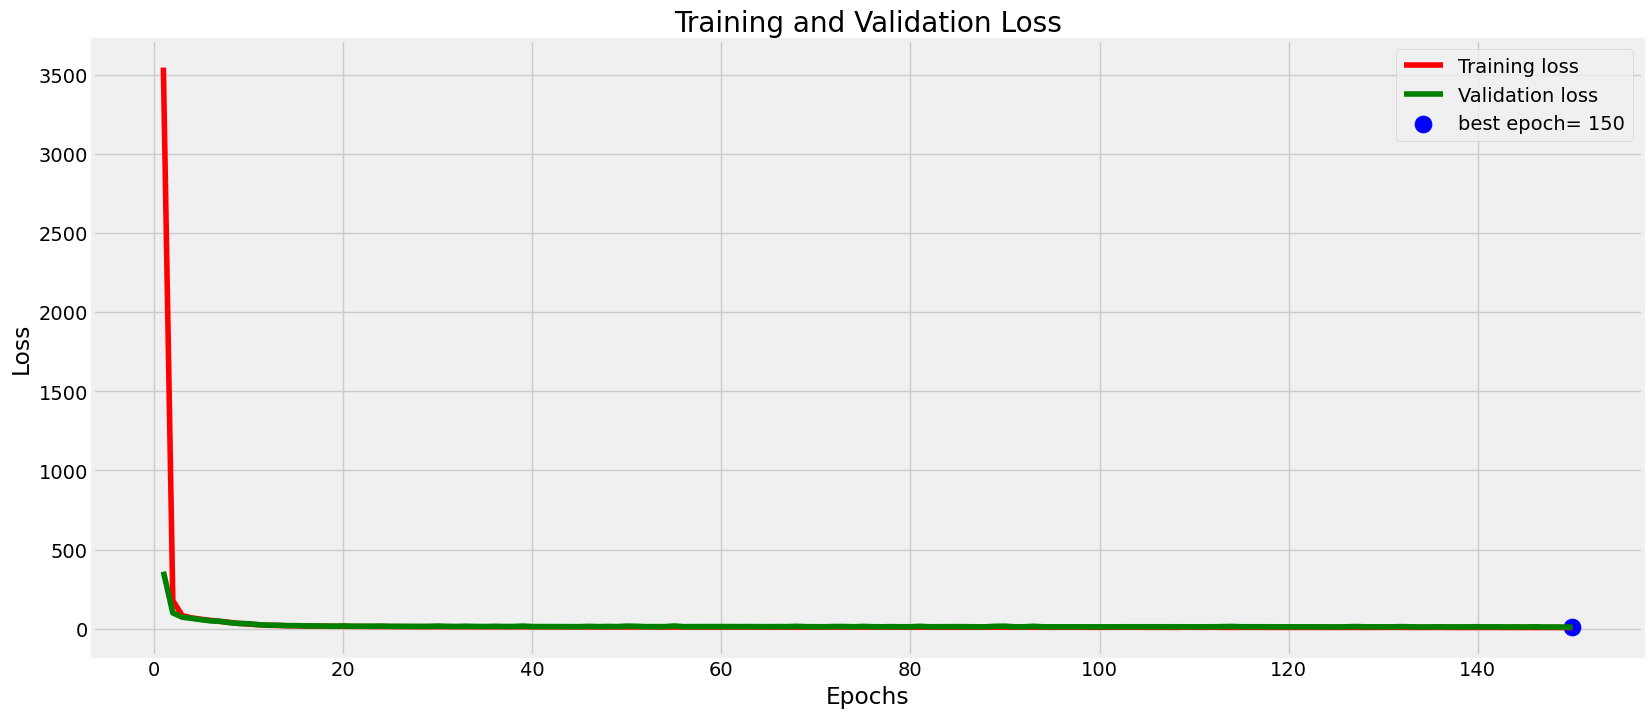

In [68]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [69]:
#metrics=['mean_absolute_error','mean_squared_error']

mae = history.history['mean_absolute_error']

acc_loss_df = pd.DataFrame({"Mean Absolute error" : mae,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Mean Absolute error','Loss'])

,Mean Absolute error,Loss,Epoch
0,56.898788,3544.477295,1
1,10.322259,178.122589,2
2,7.267855,82.679062,3
3,6.693869,68.916473,4
4,6.268477,60.291908,5
5,5.859414,53.085392,6
6,5.482529,46.732746,7
7,5.112158,40.549934,8
8,4.649521,34.365688,9
9,4.297969,29.606419,10


### **<font color = "purple">Prediction</font>**

In [71]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [72]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9012434051636752


In [73]:
model.save("regression_model.keras")

In [75]:
loaded_model = load_model('regression_model.keras')

In [77]:
loaded_model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[71.58313 ],
       [75.77184 ],
       [76.48797 ],
       [78.18655 ],
       [52.202328],
       [54.719925],
       [69.06847 ],
       [73.99534 ],
       [76.32967 ],
       [58.038315],
       [49.649643],
       [57.416367],
       [54.89801 ],
       [75.25776 ],
       [72.548256],
       [57.487953],
       [60.255394],
       [82.177345],
       [62.17567 ],
       [81.33834 ],
       [81.56915 ],
       [82.181625],
       [72.25173 ],
       [69.71491 ],
       [71.011635],
       [62.435623],
       [55.41344 ],
       [65.39773 ],
       [84.696144],
       [74.589966],
       [65.95214 ],
       [75.0503  ],
       [74.08492 ],
       [64.60084 ],
       [80.656685],
       [46.34859 ],
       [57.763977],
       [73.324165],
       [66.79179 ],
       [74.69012 ],
       [58.921627],
       [58.960846],
       [76.266945],
       [85.06505 ],
       [75.7877  ],
       [49.56198 ],
       [80.08898 ],
       [75.14744 ],
       [61.059998],
       [72.39573 ],
